In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Read CSV to make initial df
df_ufo = pd.read_csv('final_data.csv')
df_ufo

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
0,1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,29.883056,-97.941111,2004-04-27
1,2,1956-10-10 21:00:00,edna,tx,us,circle,20.0,28.978333,-96.645833,2004-01-17
2,3,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,21.418056,-157.803611,2004-01-22
3,4,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,36.595000,-82.188889,2007-04-27
4,5,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,41.117500,-73.408333,1999-10-02
...,...,...,...,...,...,...,...,...,...,...
65109,65110,2013-09-09 21:15:00,nashville,tn,us,light,600.0,36.165833,-86.784444,2013-09-30
65110,65111,2013-09-09 22:00:00,boise,id,us,circle,1200.0,43.613611,-116.202500,2013-09-30
65111,65112,2013-09-09 22:00:00,napa,ca,us,other,1200.0,38.297222,-122.284444,2013-09-30
65112,65113,2013-09-09 22:20:00,vienna,va,us,circle,5.0,38.901111,-77.265556,2013-09-30


In [38]:
# Check datatypes.
df_ufo.dtypes

ID                    int64
datetime             object
city                 object
state                object
country              object
shape                object
duration_seconds    float64
latitude            float64
longitude           float64
date_posted          object
dtype: object

In [39]:
# Fix datatypes.
df_ufo['datetime'] = pd.to_datetime(df_ufo['datetime'])
df_ufo['date_posted'] = pd.to_datetime(df_ufo['date_posted'])

In [40]:
# Check datatypes again.
df_ufo.dtypes

ID                           int64
datetime            datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
duration_seconds           float64
latitude                   float64
longitude                  float64
date_posted         datetime64[ns]
dtype: object

In [41]:
# Find the average and median duration of observations.
average_duration = df_ufo["duration_seconds"].mean()
median_duration = df_ufo["duration_seconds"].median()
print(f"Average duration: {average_duration} seconds")
print(f"Median duration: {median_duration} seconds")

Average duration: 5800.014047363085 seconds
Median duration: 180.0 seconds


In [42]:
# Sort values by longest and shortest durations.
longest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=False)
display(longest_obs.head())

shortest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=True)
display(shortest_obs.head())

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
60480,60481,1991-09-15 18:00:00,greenbrier,ar,us,light,66276000.0,35.233889,-92.387500,2008-03-31
52325,52326,2012-08-10 21:00:00,finley,wa,us,light,52623200.0,46.154167,-119.032778,2012-08-19
56117,56118,2002-08-24 01:00:00,englewood,fl,us,light,52623200.0,26.961667,-82.352778,2002-08-28
57680,57681,2008-08-03 21:00:00,virginia beach,va,us,fireball,10526400.0,36.852778,-75.978333,2008-08-12
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.0,33.728333,-117.145556,2005-02-22


,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
34792,34793,1987-05-15 23:00:00,island lake,il,us,light,0.01,42.276111,-88.191944,2012-01-12
46079,46080,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,41.750000,-87.804167,2004-01-17
19658,19659,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,45.696111,-121.285000,1999-12-16
57057,57058,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,44.621667,-123.937222,2002-09-06
11158,11159,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,45.446389,-122.638056,2001-12-05


In [43]:
# Create a new year column for grouping
df_ufo['year'] = df_ufo['datetime'].dt.year

In [44]:
# Group by year and find out which years had the most sightings.
most_active_years = df_ufo.groupby('year').count()
most_active_years = most_active_years["ID"]
most_active_years = most_active_years.sort_values(ascending=False)
display(most_active_years.head(10))


year
2012    6322
2013    6054
2011    4379
2008    4017
2009    3677
2010    3548
2007    3470
2004    3244
2005    3228
2003    2958
Name: ID, dtype: int64

In [45]:
# Group by year and find out which years had the least sightings.
least_active_years = df_ufo.groupby('year').count()
least_active_years = least_active_years["ID"]
least_active_years = least_active_years.sort_values(ascending=True)
display(least_active_years.head(10))

year
1920    1
1925    1
1929    1
1934    1
1936    1
1941    1
1943    1
1910    2
1931    2
1937    2
Name: ID, dtype: int64

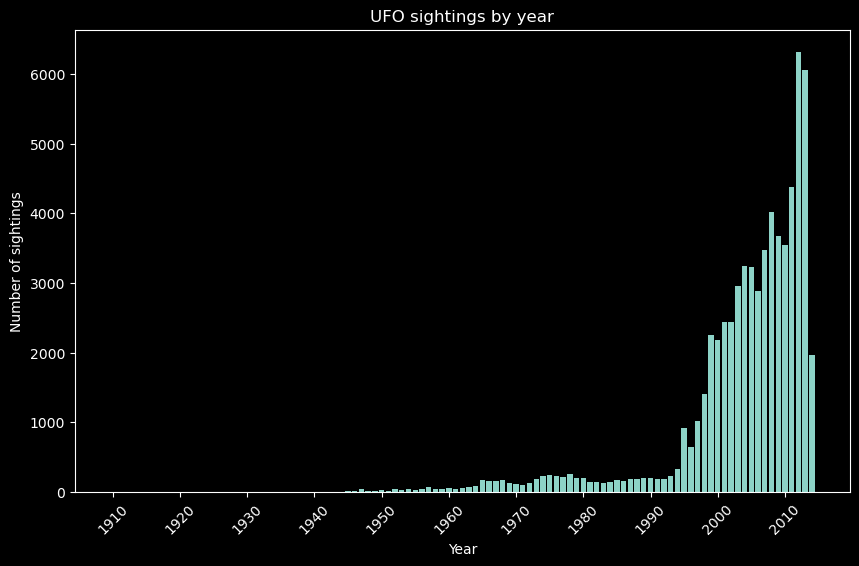

In [50]:
sightings_by_year = df_ufo.groupby('year').count()
sightings_by_year = sightings_by_year["ID"]

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_year.index, sightings_by_year.values)

# Customize x-axis ticks to show only every decade
plt.xticks(range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), \
           range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), rotation=45)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings by year')

# Show the plot
plt.show()

In [47]:
# Find out which shapes, cities, and states had the most and least sightings.